# Random Forest Classifier Exercise with SKLearn

**Overview**

The objective is to use a RandomForest Classifier to predict if the students will pass the math exam based on the rest of the features.
There is no target column, as it has to be created during the cleaning part of the process.

**Dataset**
The dataset has features relative to environment and the family situation of each student, as well as grades in other subjects.
Source:
https://raw.githubusercontent.com/rashida048/Datasets/refs/heads/master/StudentsPerformance.csv


**Objectives**

• Data cleaning and target definition

• Categorical encoding

• Random Forest Classification

• Evalutation with classification report, confusion matrix etc.

• GridSearch Optimization

## Data loading and basic EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV


df = pd.read_csv("https://raw.githubusercontent.com/rashida048/Datasets/refs/heads/master/StudentsPerformance.csv")

df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


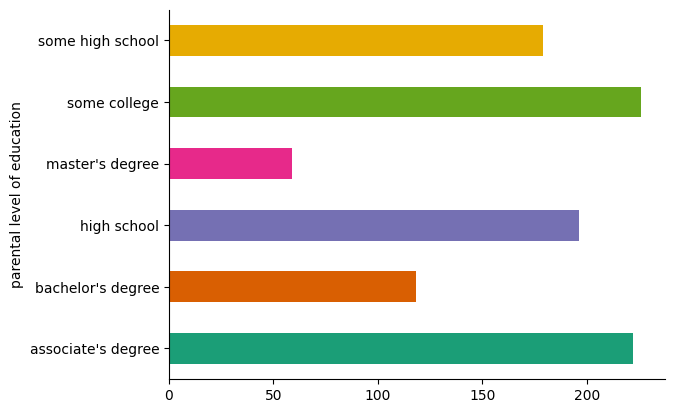

In [2]:
# @title parental level of education

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('parental level of education').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

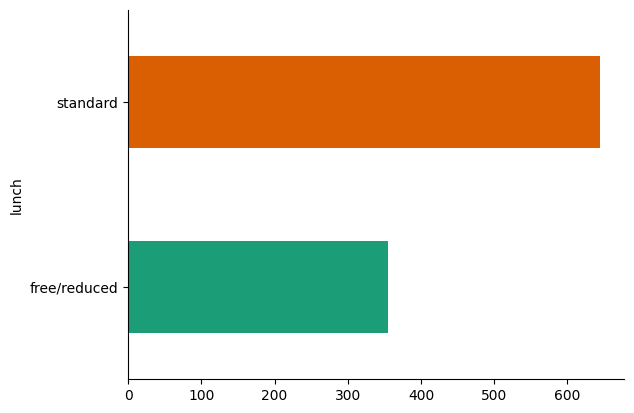

In [3]:
# @title lunch

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('lunch').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

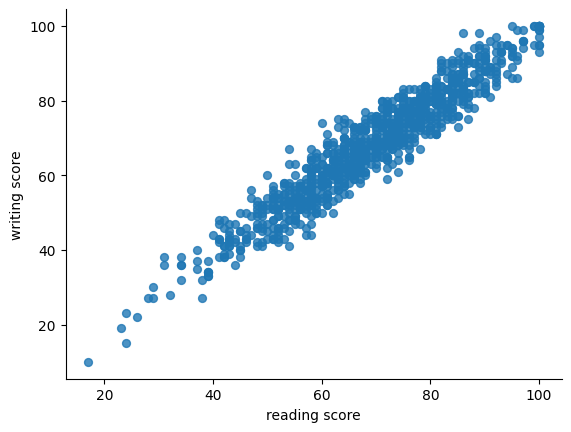

In [4]:
# @title reading score vs writing score

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='reading score', y='writing score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

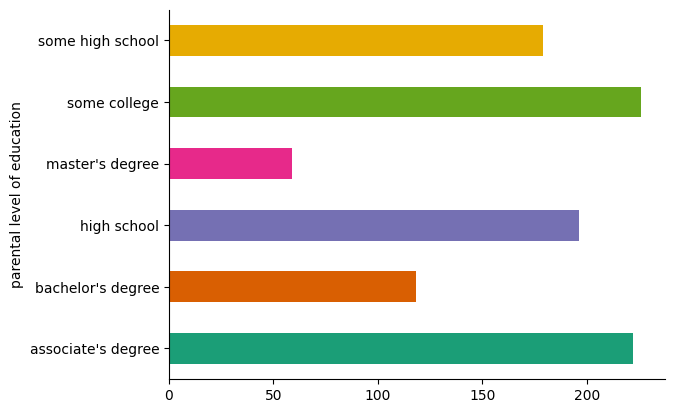

In [5]:
# @title parental level of education

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('parental level of education').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

## Data cleaning and preprocessing

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
df.corr(numeric_only= True)

# there is a strong correlation between writing score and reading score. I am gonna replace the columns with an average
# this will reduce redundancy but keep the information of the columns, as I deem it relevant in the context

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


<Axes: xlabel='None', ylabel='reading score'>

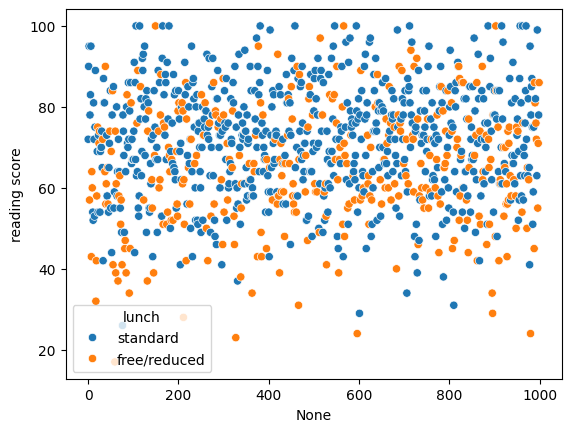

In [8]:
sns.scatterplot(data = df, x = df.index, y = "reading score", hue = "lunch")

# I was just curious about lunch here

In [9]:
df["language score"] = df[["reading score", "writing score"]].mean(axis = 1)
df.drop(["reading score", "writing score"], axis = 1, inplace= True)

df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,language score
0,female,group B,bachelor's degree,standard,none,72,73.0
1,female,group C,some college,standard,completed,69,89.0
2,female,group B,master's degree,standard,none,90,94.0
3,male,group A,associate's degree,free/reduced,none,47,50.5
4,male,group C,some college,standard,none,76,76.5
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,97.0
996,male,group C,high school,free/reduced,none,62,55.0
997,female,group C,high school,free/reduced,completed,59,68.0
998,female,group D,some college,standard,completed,68,77.5


In [ ]:
# Creation of the target column

# I am gonna make a column using =>60 as the requirment to pass the exam. After creating the target column, I will remove the original
# math score column as to not cheat the results of the prediction, as it would be a direct correlation to the target column.

pass_grade = 60

df["test result"] = (df["math score"] >= pass_grade)

df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,language score,test result
0,female,group B,bachelor's degree,standard,none,72,73.0,True
1,female,group C,some college,standard,completed,69,89.0,True
2,female,group B,master's degree,standard,none,90,94.0,True
3,male,group A,associate's degree,free/reduced,none,47,50.5,False
4,male,group C,some college,standard,none,76,76.5,True
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,97.0,True
996,male,group C,high school,free/reduced,none,62,55.0,True
997,female,group C,high school,free/reduced,completed,59,68.0,False
998,female,group D,some college,standard,completed,68,77.5,True


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   int64  
 6   language score               1000 non-null   float64
 7   test result                  1000 non-null   bool   
dtypes: bool(1), float64(1), int64(1), object(5)
memory usage: 55.8+ KB


In [12]:
# split in features and target

X = df.drop(["math score", "test result"], axis = 1)
y = df["test result"]

# dataset ready for the next step of preprocessing

In [13]:
# train-test split. best to do it now to make sure information will not leak on the test samples

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
# feature preprocessing
# we have both numerical and categorical columns. We are gonna use a MinMaxScaler to handle numbers and OneHotEncoder for categories.
# to do so we are gonna operate a Pipeline using ColumnTransformer, and then recreate the dataframes for ease of use with the new columns
# once processed, the DF becomes a numpy array, so it's gonna take an extra step to remake the DF.

col_num = ["language score"] #numerical column(s)
col_cat = ["gender", "race/ethnicity", "parental level of education", "lunch", "test preparation course"] #categorical column(s)

num_pipe = Pipeline(steps=[("scaler", MinMaxScaler())])
cat_pipe = Pipeline(steps=[("encoder", OneHotEncoder())])

preprocessor = ColumnTransformer(transformers=[("cat", cat_pipe, col_cat), ("num", num_pipe, col_num)])

preprocessor.fit(X_train)

# let's put the columns aside so we can call them later to recreate the DF
cat_columns = preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(col_cat)
columns = np.append(cat_columns, col_num)


# preoprocessing and DF rebuilding
X_trainT = pd.DataFrame(preprocessor.transform(X_train), columns=columns)

X_testT = pd.DataFrame(preprocessor.transform(X_test), columns=columns)

In [15]:
# variables reassigning for ease of use

X_train = X_trainT
X_test = X_testT


In [16]:
X_test # perfect, encoded and scaled

,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none,language score
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.803922
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.601307
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.640523
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.673203
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.745098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.823529
296,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.483660
297,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.424837
298,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.228758


## Model application and evalutation

In [17]:
# RandomForest setup and first try

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state= 42) # let's keep the default parameters for now

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

0.8666666666666667

              precision    recall  f1-score   support

       False       0.87      0.73      0.79       105
        True       0.87      0.94      0.90       195

    accuracy                           0.87       300
   macro avg       0.87      0.84      0.85       300
weighted avg       0.87      0.87      0.86       300



<Axes: >

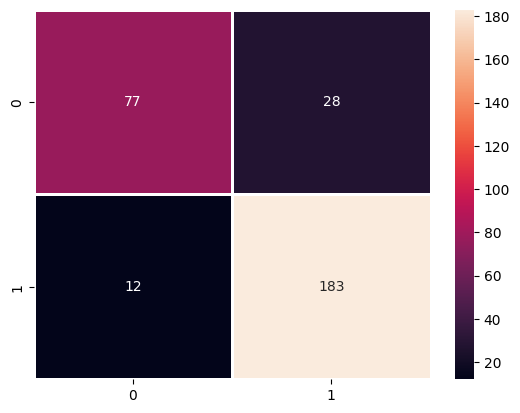

In [18]:
# model evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(accuracy_score(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))

cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='g')


## Results (first try)

The result is pretty good. RandomForest works well with datasets with a lot of features, after all. 
Let's see if we can improve it a bit by tuning around.

## GridSearchCV implementation

In [19]:
param_grid = {"n_estimators": [50, 100, 150, 200]} # let's try different numbers of estimators

grid = GridSearchCV(estimator= clf, param_grid= param_grid, cv = 5)

grid.fit(X_train, y_train)

print("Parametri migliori:", grid.best_params_)


Parametri migliori: {'n_estimators': 50}


In [20]:
# turns out 50 estimators is the best number. Let's try it.

clf2 = RandomForestClassifier(n_estimators=50, random_state=42)

clf2.fit(X_train, y_train)

y_pred = clf2.predict(X_test)

print(f"({accuracy_score(y_test, y_pred)*100})%")
print()
print(classification_report(y_test, y_pred))

(87.0)%

              precision    recall  f1-score   support

       False       0.88      0.73      0.80       105
        True       0.87      0.94      0.90       195

    accuracy                           0.87       300
   macro avg       0.87      0.84      0.85       300
weighted avg       0.87      0.87      0.87       300



<Axes: >

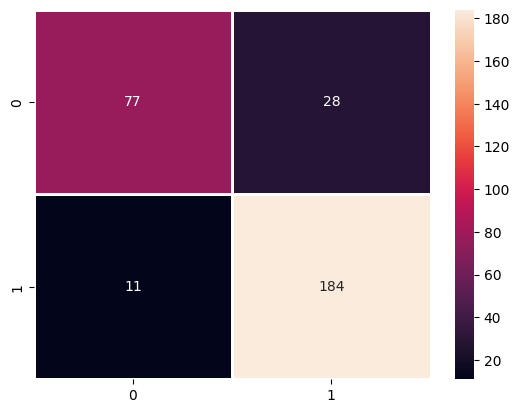

In [21]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='g')

# not that much of a difference...
# let's try again

## Another GridSearchCV Implementation and tuning

In [ ]:
# this is the param grid that I want to test. Since I know I am gonna get the default values of a lot of params, here's the only one
# that is gonna give out significant results

param_grid = {
    "n_estimators": [50, 100, 200],
    "min_samples_leaf": [1,2,3],
}

# param_grid = {"n_estimators": [50, 75, 100, 150, 200],
# "min_samples_split": [1,2,3],
# "min_samples_leaf": [1,2,3],
# "criterion": ['gini', 'entropy', 'log_loss'],
# "max_features" : ['sqrt', 'log2']}

grid = GridSearchCV(estimator= clf, param_grid= param_grid, cv = 5)

grid.fit(X_train, y_train)

print("Parametri migliori:", grid.best_params_)

Parametri migliori: {'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 50}


c:\Users\Utente\Documents\PythonV\venv_310\lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
450 fits failed out of a total of 1350.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
450 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Utente\Documents\PythonV\venv_310\lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Utente\Documents\PythonV\venv_310\lib\site-packages\sklearn\base.py", line 1356, in wrapper
    estimator._validate_params()
  File "c:\Users\Utente\Documents\PythonV\venv_310\lib\site-packages\sklearn\base.py", line 469, in _validate_params
    validat

(88.0)%

              precision    recall  f1-score   support

       False       0.89      0.72      0.80        97
        True       0.88      0.96      0.92       203

    accuracy                           0.88       300
   macro avg       0.88      0.84      0.86       300
weighted avg       0.88      0.88      0.88       300



<Axes: >

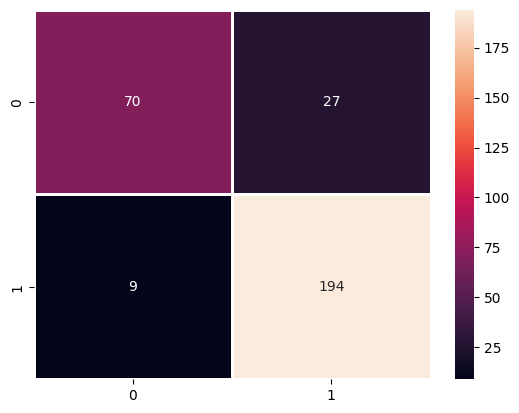

In [28]:
# let's assign the best params to the classifier

clf2 = RandomForestClassifier(n_estimators=50, min_samples_leaf=3, random_state=42)

clf2.fit(X_train, y_train)

y_pred = clf2.predict(X_test)


print(f"({accuracy_score(y_test, y_pred)*100})%")
print()
print(classification_report(y_test, y_pred))

cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='g')


## Final Results

RandomForest performed quite well on this dataset, giving out 87% of accuracy and F1 score on average with 50 estimators.
Since the dataset is pretty simple, 50 trees must be enough for the model to get the pattern in student performances.

## Extra: Stratified Sampling

The frequency of students that passed and didn't pass the exam in the dataset is 70/30. Let's try to reflect that in the sampling.

In [24]:
X = df.drop(["math score", "test result"], axis = 1)
y = df["test result"]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) #adding stratification here

In [26]:
col_num = ["language score"]
col_cat = ["gender", "race/ethnicity", "parental level of education", "lunch", "test preparation course"]

num_pipe = Pipeline(steps=[("scaler", MinMaxScaler())])
cat_pipe = Pipeline(steps=[("encoder", OneHotEncoder())])

preprocessor = ColumnTransformer(transformers=[("cat", cat_pipe, col_cat), ("num", num_pipe, col_num)])

preprocessor.fit(X_train)

cat_columns = preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(col_cat)
columns = np.append(cat_columns, col_num)

X_trainT = pd.DataFrame(preprocessor.transform(X_train), columns=columns)

X_testT = pd.DataFrame(preprocessor.transform(X_test), columns=columns)

X_train = X_trainT
X_test = X_testT


(86.33333333333333)%

              precision    recall  f1-score   support

       False       0.81      0.75      0.78        97
        True       0.89      0.92      0.90       203

    accuracy                           0.86       300
   macro avg       0.85      0.83      0.84       300
weighted avg       0.86      0.86      0.86       300



<Axes: >

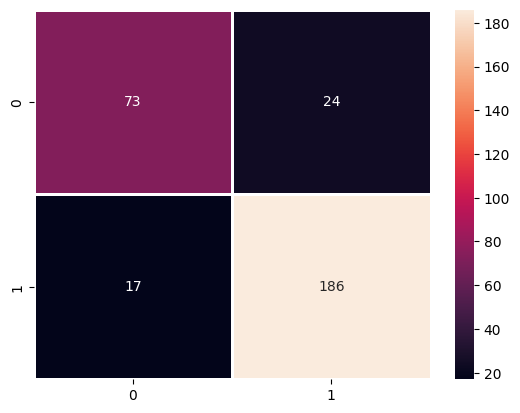

In [27]:
clf2 = RandomForestClassifier(n_estimators=50, random_state=42)

clf2.fit(X_train, y_train)

y_pred = clf2.predict(X_test)


print(f"({accuracy_score(y_test, y_pred)*100})%")
print()
print(classification_report(y_test, y_pred))

cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='g')

# similar performance, but better Precision.